## Import Needed Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D , Activation, MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import Adamax,Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import  EarlyStopping,ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

print('models loaded')

models loaded


## Read Data

### Training Data

In [2]:
data_dir='/kaggle/input/teeth-disease/Teeth_DataSet/Teeth_Dataset'
target_folder='Training'
filepath=[]
labels=[]
all_folder_path = os.path.join(data_dir, target_folder)

if os.path.isdir(all_folder_path):
    filelist = os.listdir(all_folder_path)
    for f in filelist:
        fpath = os.path.join(all_folder_path, f)
        fipath=os.listdir(fpath)
        for image in fipath:
            path = os.path.join(fpath, image)
            filepath.append(path)
            labels.append(f)

f_series = pd.Series(filepath, name='filepath')
l_series = pd.Series(labels, name='labels')
train_df = pd.concat([f_series, l_series], axis=1)
train_df

filepath labels
0     /kaggle/input/teeth-disease/Teeth_DataSet/Teet...     OC
1     /kaggle/input/teeth-disease/Teeth_DataSet/Teet...     OC
2     /kaggle/input/teeth-disease/Teeth_DataSet/Teet...     OC
3     /kaggle/input/teeth-disease/Teeth_DataSet/Teet...     OC
4     /kaggle/input/teeth-disease/Teeth_DataSet/Teet...     OC
...                                                 ...    ...
3082  /kaggle/input/teeth-disease/Teeth_DataSet/Teet...    OLP
3083  /kaggle/input/teeth-disease/Teeth_DataSet/Teet...    OLP
3084  /kaggle/input/teeth-disease/Teeth_DataSet/Teet...    OLP
3085  /kaggle/input/teeth-disease/Teeth_DataSet/Teet...    OLP
3086  /kaggle/input/teeth-disease/Teeth_DataSet/Teet...    OLP

[3087 rows x 2 columns]

### Validation Data 

In [3]:
data_dir='/kaggle/input/teeth-disease/Teeth_DataSet/Teeth_Dataset'
target_folder='Validation'
filepath=[]
labels=[]
all_folder_path = os.path.join(data_dir, target_folder)

if os.path.isdir(all_folder_path):
    filelist = os.listdir(all_folder_path)
    for f in filelist:
        fpath = os.path.join(all_folder_path, f)
        fipath=os.listdir(fpath)
        for image in fipath:
            path = os.path.join(fpath, image)
            filepath.append(path)
            labels.append(f)

f_series = pd.Series(filepath, name='filepath')
l_series = pd.Series(labels, name='labels')
valid_df = pd.concat([f_series, l_series], axis=1)
valid_df

filepath labels
0     /kaggle/input/teeth-disease/Teeth_DataSet/Teet...     OC
1     /kaggle/input/teeth-disease/Teeth_DataSet/Teet...     OC
2     /kaggle/input/teeth-disease/Teeth_DataSet/Teet...     OC
3     /kaggle/input/teeth-disease/Teeth_DataSet/Teet...     OC
4     /kaggle/input/teeth-disease/Teeth_DataSet/Teet...     OC
...                                                 ...    ...
1023  /kaggle/input/teeth-disease/Teeth_DataSet/Teet...    OLP
1024  /kaggle/input/teeth-disease/Teeth_DataSet/Teet...    OLP
1025  /kaggle/input/teeth-disease/Teeth_DataSet/Teet...    OLP
1026  /kaggle/input/teeth-disease/Teeth_DataSet/Teet...    OLP
1027  /kaggle/input/teeth-disease/Teeth_DataSet/Teet...    OLP

[1028 rows x 2 columns]

### Test Data

In [4]:
data_dir='/kaggle/input/teeth-disease/Teeth_DataSet/Teeth_Dataset'
target_folder='Testing'
filepath=[]
labels=[]
all_folder_path = os.path.join(data_dir, target_folder)

if os.path.isdir(all_folder_path):
    filelist = os.listdir(all_folder_path)
    for f in filelist:
        fpath = os.path.join(all_folder_path, f)
        fipath=os.listdir(fpath)
        for image in fipath:
            path = os.path.join(fpath, image)
            filepath.append(path)
            labels.append(f)

f_series = pd.Series(filepath, name='filepath')
l_series = pd.Series(labels, name='labels')
test_df = pd.concat([f_series, l_series], axis=1)
test_df

filepath labels
0     /kaggle/input/teeth-disease/Teeth_DataSet/Teet...     OC
1     /kaggle/input/teeth-disease/Teeth_DataSet/Teet...     OC
2     /kaggle/input/teeth-disease/Teeth_DataSet/Teet...     OC
3     /kaggle/input/teeth-disease/Teeth_DataSet/Teet...     OC
4     /kaggle/input/teeth-disease/Teeth_DataSet/Teet...     OC
...                                                 ...    ...
1023  /kaggle/input/teeth-disease/Teeth_DataSet/Teet...    OLP
1024  /kaggle/input/teeth-disease/Teeth_DataSet/Teet...    OLP
1025  /kaggle/input/teeth-disease/Teeth_DataSet/Teet...    OLP
1026  /kaggle/input/teeth-disease/Teeth_DataSet/Teet...    OLP
1027  /kaggle/input/teeth-disease/Teeth_DataSet/Teet...    OLP

[1028 rows x 2 columns]

## Visulization

### count train Data

In [5]:
train_counts = train_df['labels'].value_counts().reset_index()
train_counts.columns = ['labels', 'count']

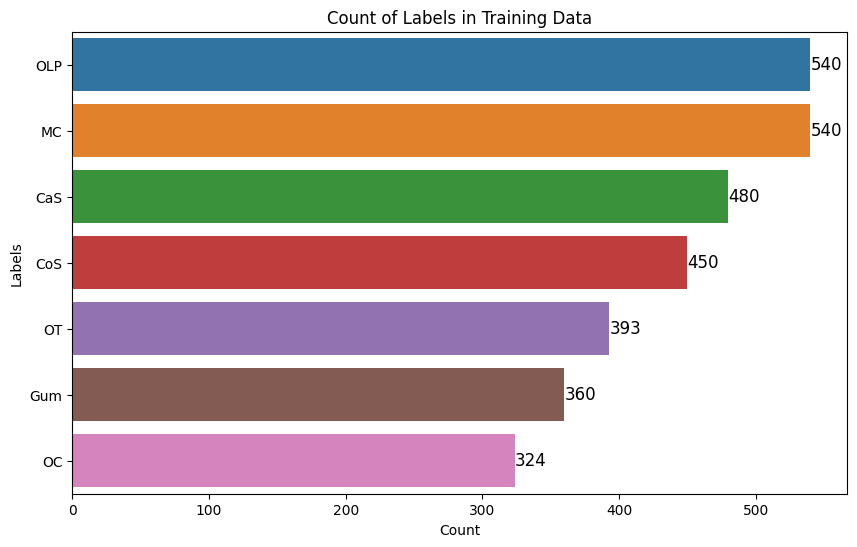

In [6]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=train_counts, x='count', y='labels')
for index, row in train_counts.iterrows():
    ax.text(row['count'], index, str(row['count']), va='center', fontsize=12)
plt.title('Count of Labels in Training Data')
plt.xlabel('Count')
plt.ylabel('Labels')
plt.show()

### Count Validation Data

In [7]:
valid_counts = valid_df['labels'].value_counts().reset_index()
valid_counts.columns = ['labels', 'count']

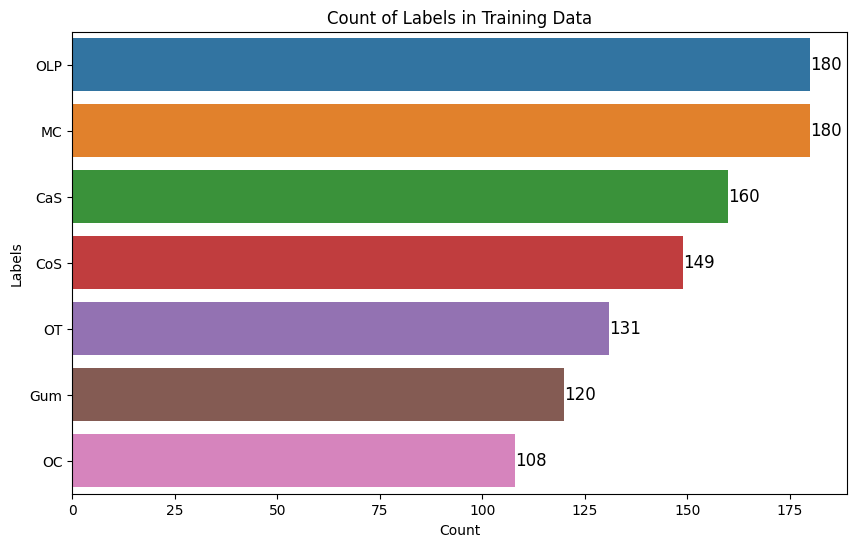

In [8]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=valid_counts, x='count', y='labels')
for index, row in valid_counts.iterrows():
    ax.text(row['count'], index, str(row['count']), va='center', fontsize=12)
plt.title('Count of Labels in Training Data')
plt.xlabel('Count')
plt.ylabel('Labels')
plt.show()

### Count test Data

In [9]:
test_counts = test_df['labels'].value_counts().reset_index()
test_counts.columns = ['labels', 'count']

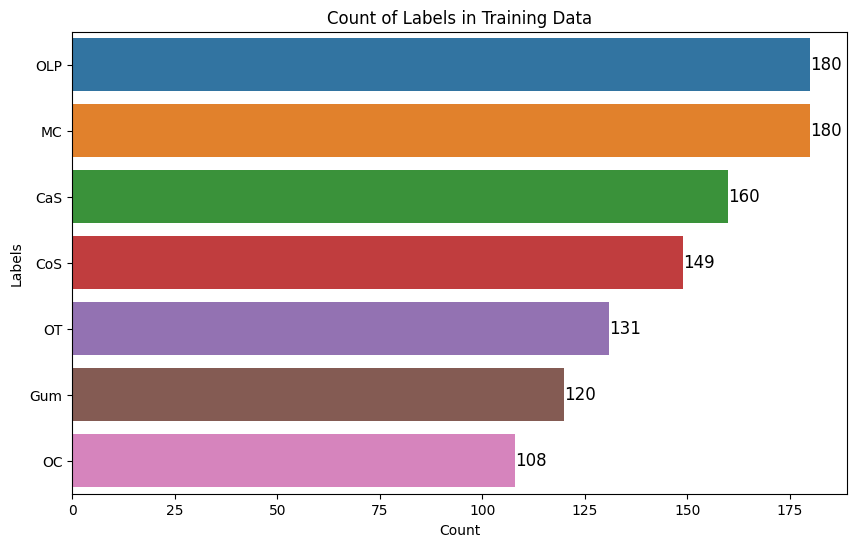

In [10]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=test_counts, x='count', y='labels')
for index, row in test_counts.iterrows():
    ax.text(row['count'], index, str(row['count']), va='center', fontsize=12)
plt.title('Count of Labels in Training Data')
plt.xlabel('Count')
plt.ylabel('Labels')
plt.show()

## sample from images before Augmentation

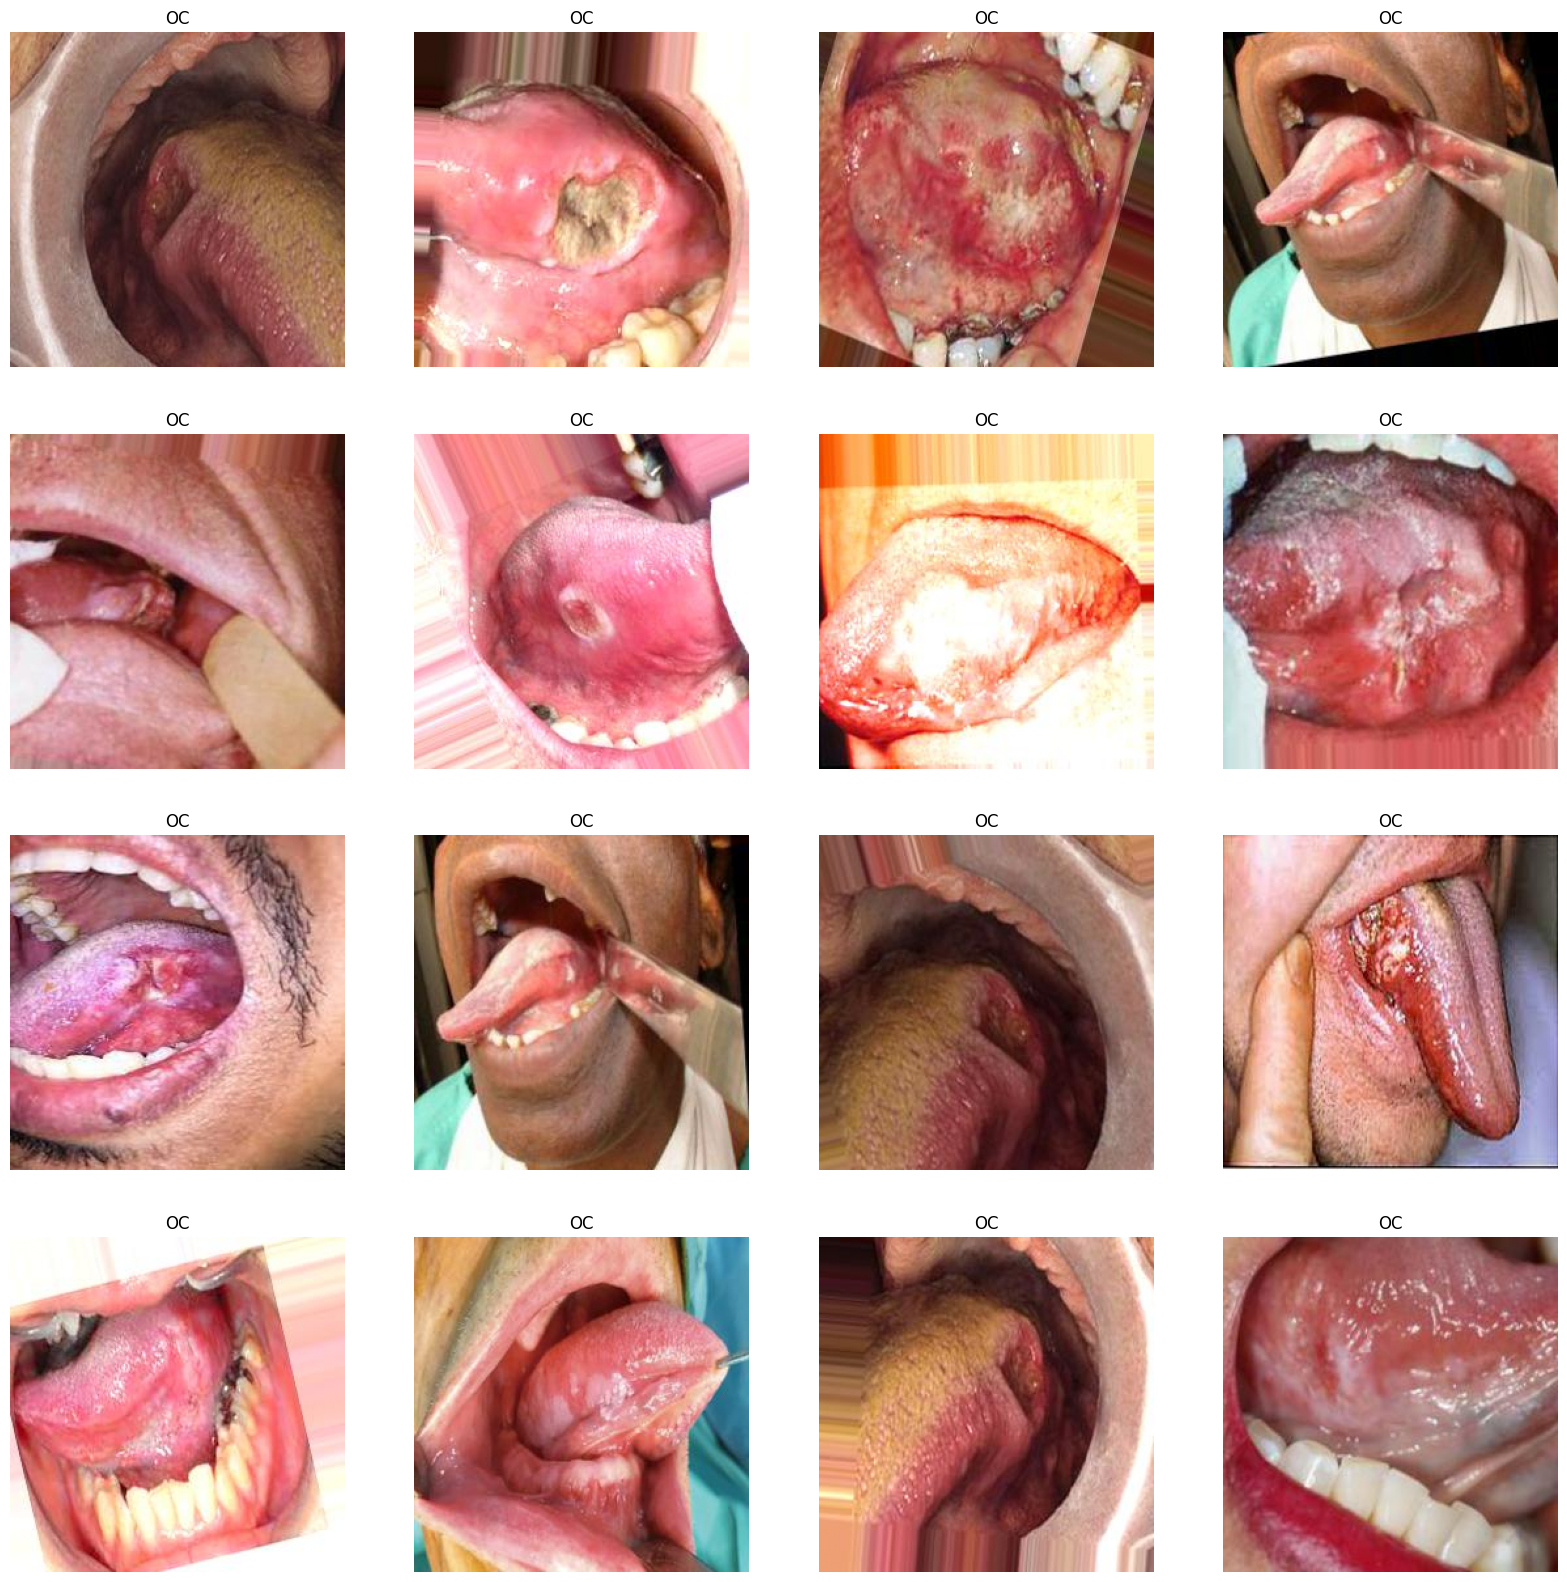

In [11]:
classes = train_df['labels'].unique()

g_dict = {class_name: index for index, class_name in enumerate(classes)}
plt.figure(figsize=(20, 20))
for i in range(min(16, len(train_df))):
    plt.subplot(4, 4, i + 1)
    img_path = train_df.iloc[i]['filepath']
    image = Image.open(img_path)
    image = np.array(image) / 255  
    plt.imshow(image)
    class_name = train_df.iloc[i]['labels']
    plt.title(class_name, color='black', fontsize=12)
    plt.axis('off')
plt.show()

In [12]:
print(train_df.shape)
print(valid_df.shape)
print(test_df.shape)

(3087, 2)
(1028, 2)
(1028, 2)


## Data Augmentation

In [13]:
batch_size = 32
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
gen = ImageDataGenerator()
ts_gen=ImageDataGenerator()

train_gen = gen.flow_from_dataframe( train_df, x_col= 'filepath', y_col= 'labels', target_size= img_size,
                                    class_mode= 'categorical',color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_gen = gen.flow_from_dataframe( valid_df, x_col= 'filepath', y_col= 'labels', target_size= img_size, 
                                    class_mode= 'categorical',color_mode= 'rgb', shuffle= True, batch_size= batch_size)
test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepath', y_col= 'labels', target_size= img_size, 
                                    class_mode= 'categorical',color_mode= 'rgb', shuffle= True, batch_size= batch_size)

Found 3087 validated image filenames belonging to 7 classes.
Found 1028 validated image filenames belonging to 7 classes.
Found 1028 validated image filenames belonging to 7 classes.


## sample from images after Augmentation

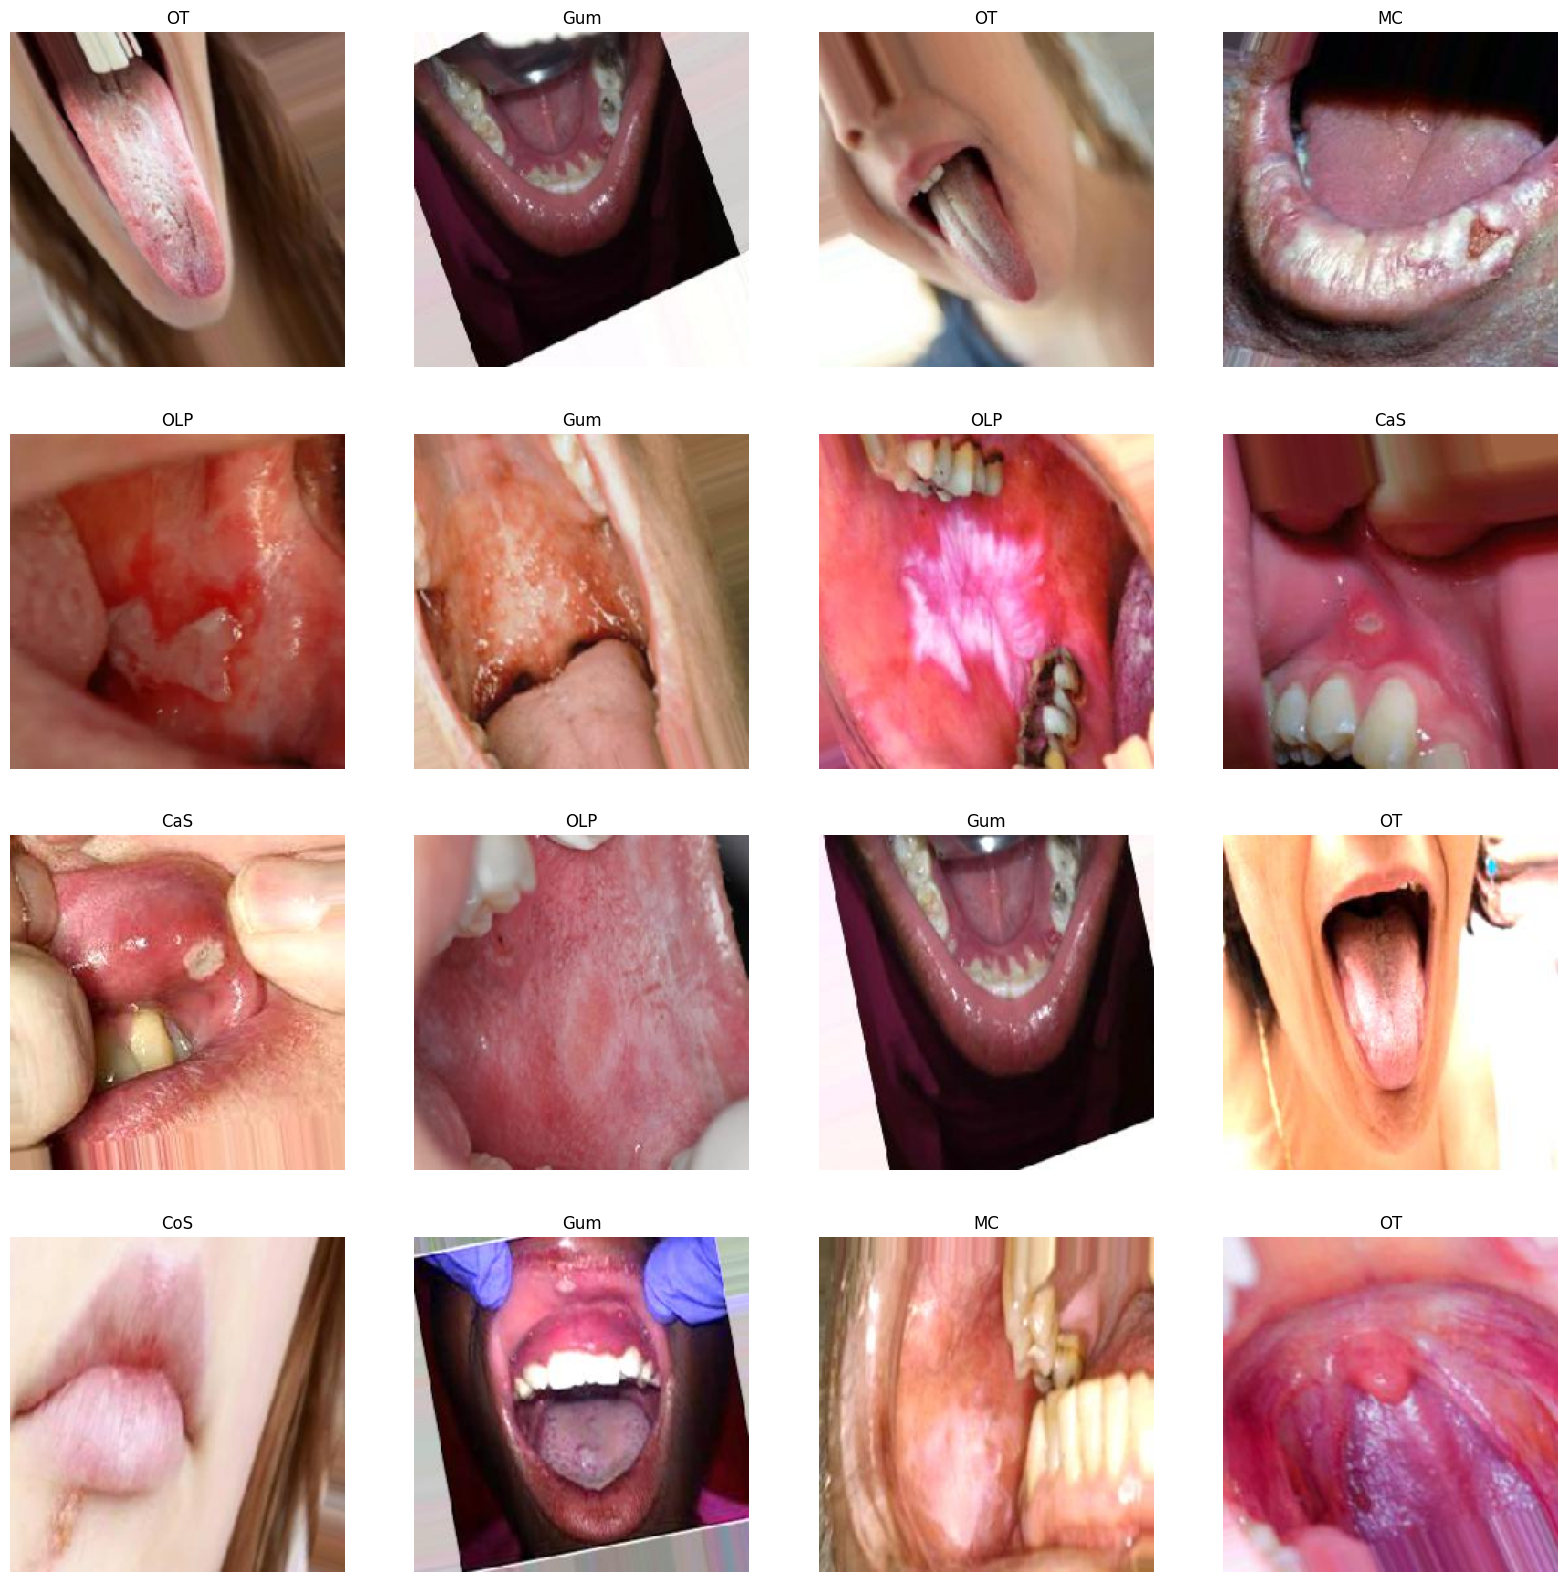

In [14]:
g_dict = train_gen.class_indices
classes = list(g_dict.keys())
images, labels = next(train_gen)

plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name, color= 'black', fontsize= 12)
    plt.axis('off')
plt.show()

## Build Model

In [15]:
model = Sequential([
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(256, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(512, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(7, activation='softmax')
])

model.compile(optimizer=Adamax(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy',
                                                                        tf.keras.metrics.Precision(name='precision'), 
                                                                        tf.keras.metrics.Recall(name='recall')])


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 224, 224, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 112, 112, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 56, 56, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 28, 28, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      51,380,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,002,119 (202.19 MB)

 Trainable params: 53,000,199 (202.18 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [17]:
early_stopping = EarlyStopping(monitor='val_accuracy',patience=5,restore_best_weights=True)
history=model.fit(train_gen,epochs=100,validation_data=valid_gen,
                  callbacks=[early_stopping])

Epoch 1/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 43s 297ms/step - accuracy: 0.2026 - loss: 11.2555 - precision: 0.2067 - recall: 0.1855 - val_accuracy: 0.1994 - val_loss: 1.9685 - val_precision: 0.5625 - val_recall: 0.0263
Epoch 2/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 11s 105ms/step - accuracy: 0.2019 - loss: 2.4485 - precision: 0.2663 - recall: 0.0725 - val_accuracy: 0.2451 - val_loss: 1.8891 - val_precision: 0.9444 - val_recall: 0.0165
Epoch 3/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 11s 107ms/step - accuracy: 0.2129 - loss: 2.0912 - precision: 0.3110 - recall: 0.0422 - val_accuracy: 0.2782 - val_loss: 1.8336 - val_precision: 0.9394 - val_recall: 0.0302
Epoch 4/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - accuracy: 0.2687 - loss: 1.9519 - precision: 0.4990 - recall: 0.0708 - val_accuracy: 0.3064 - val_loss: 1.7848 - val_precision: 0.7981 - val_recall: 0.0807
Epoch 5/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 11s 106ms/step - accuracy: 0.2605 - loss: 1.9036 - precision: 0.5598 - recall: 0.0834 - val_accuracy: 0.3268 - v

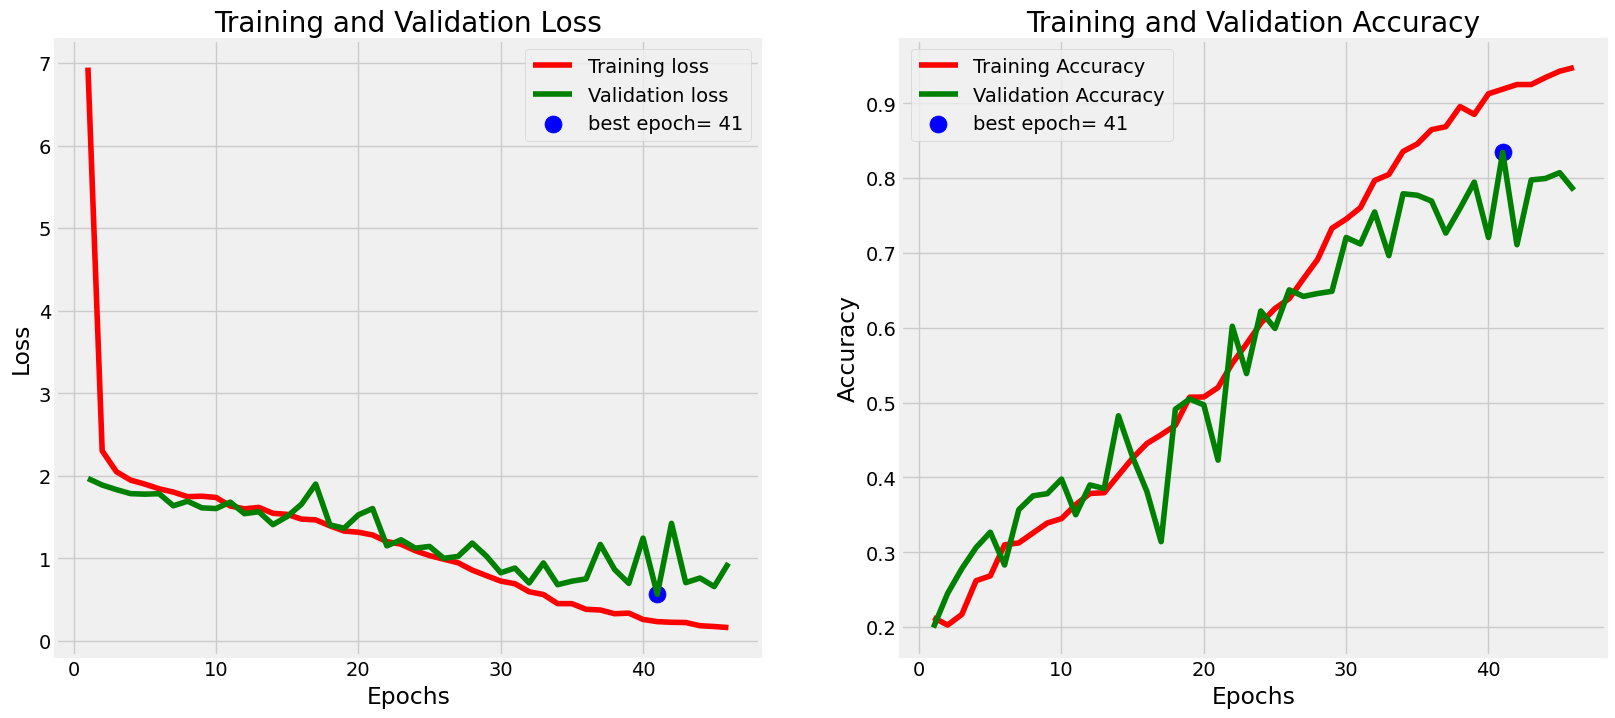

In [18]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')
plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [19]:
train_score = model.evaluate(train_gen,verbose= 1)
valid_score = model.evaluate(valid_gen,verbose= 1)
test_score = model.evaluate(test_gen,verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Valid Loss: ", valid_score[0])
print("Valid Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

97/97 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - accuracy: 0.9928 - loss: 0.0433 - precision: 0.9965 - recall: 0.9869
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.8107 - loss: 0.5717 - precision: 0.8388 - recall: 0.7770
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - accuracy: 0.8316 - loss: 0.5789 - precision: 0.8550 - recall: 0.8064
Train Loss:  0.041779909282922745
Train Accuracy:  0.9925494194030762
--------------------
Valid Loss:  0.5656272768974304
Valid Accuracy:  0.8346303701400757
--------------------
Test Loss:  0.6049469113349915
Test Accuracy:  0.8287937641143799


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━

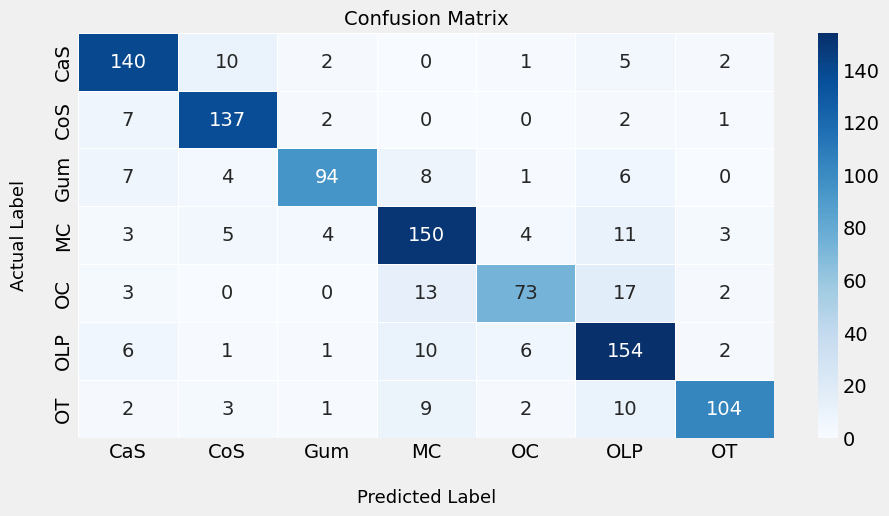

In [20]:

labels = list(test_gen.class_indices.keys())  
num_classes = len(labels)

actual_labels = []
predicted_labels = []

for i in range(len(test_gen)):
    images, batch_labels = test_gen[i]  
    batch_preds = model.predict(images)  
    batch_preds = np.argmax(batch_preds, axis=1) 

    batch_labels = np.argmax(batch_labels, axis=1)  

    actual_labels.extend(batch_labels)
    predicted_labels.extend(batch_preds)

actual_labels = np.array(actual_labels, dtype=int)
predicted_labels = np.array(predicted_labels, dtype=int)

cm = confusion_matrix(actual_labels, predicted_labels)
plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels, linewidths=0.5)
plt.xlabel('\nPredicted Label', fontsize=13)
plt.ylabel('Actual Label\n', fontsize=13)
plt.title("Confusion Matrix", fontsize=14)
plt.show()


In [21]:
report = classification_report(actual_labels, predicted_labels, target_names=labels)
print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

         CaS       0.83      0.88      0.85       160
         CoS       0.86      0.92      0.89       149
         Gum       0.90      0.78      0.84       120
          MC       0.79      0.83      0.81       180
          OC       0.84      0.68      0.75       108
         OLP       0.75      0.86      0.80       180
          OT       0.91      0.79      0.85       131

    accuracy                           0.83      1028
   macro avg       0.84      0.82      0.83      1028
weighted avg       0.83      0.83      0.83      1028

